In [6]:
import parser
import sys
import os
import matplotlib.pyplot as plt

# Get the directory one level up
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)
import plot_enrichment_profile

In [2]:
print(parser.parse_bam_modkit_pileup(
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context',
    'mod_mappings.01.parser',
    'chr1:0-250000000',
    '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    0.9,
))

> parsing region chr1:0-250000000
> parsed user-input threshold 0.9 for mod-code m
> parsed user-input threshold 0.9 for mod-code a
> calculated chunk size: 6, interval size 100000, processing 600000 positions concurrently
> Using filter threshold 0.9 for mod code m.
> Using filter threshold 0.9 for mod code a.
> Done, processed 75036762 rows. Processed ~32379 reads and skipped zero reads.


0


In [2]:
print(parser.parse_bam_modkit_extract(
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context',
    'mod_mappings.01.parser',
    'chr1:0-250000000',
    '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    0.9,
))

> parsed user-input threshold 0.9 for mod-code a
> parsed user-input threshold 0.9 for mod-code m
> specifying a motif (including --cpg) outputs only mapped sites
> found BAM index, processing reads in 100000 base pair chunks
> processed 29354 reads, 3551113 rows, skipped ~294 reads, failed ~0 reads


0


In [10]:
accessibility_pileup = plot_enrichment_profile.extract_vector_from_bedmethyl(
    bedmethyl_file = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.parser.sorted.bed.gz',
    bed_file = '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    mod_name = 'GCH',
    window_size = 1000,
)

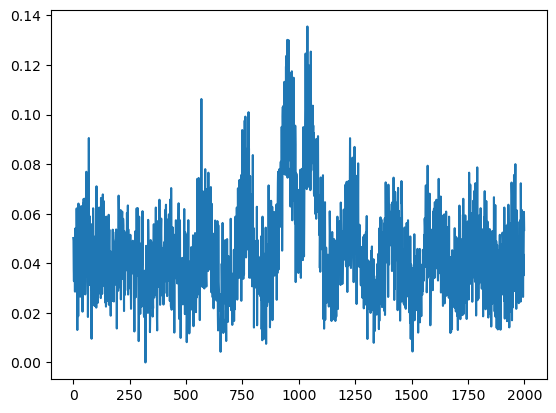

In [11]:
plt.plot(accessibility_pileup)